In [6]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
from matplotlib import pyplot as plt
import datetime
import h5py

In [7]:
# Set number of rows pandas will display.
pd.set_option('display.max_rows', 100)

In [8]:
# open the file as 'f'
with h5py.File('scintpi2_20210109.h5', 'r') as f: 
    f_items = list(f.items())

# access group GPS
    GPS = f.get('GPS')
    GPS_items = list(GPS.items())
    print(GPS_items),print()

[('SVID01', <HDF5 group "/GPS/SVID01" (4 members)>), ('SVID02', <HDF5 group "/GPS/SVID02" (4 members)>), ('SVID03', <HDF5 group "/GPS/SVID03" (4 members)>), ('SVID04', <HDF5 group "/GPS/SVID04" (4 members)>), ('SVID05', <HDF5 group "/GPS/SVID05" (4 members)>), ('SVID07', <HDF5 group "/GPS/SVID07" (4 members)>), ('SVID08', <HDF5 group "/GPS/SVID08" (4 members)>), ('SVID09', <HDF5 group "/GPS/SVID09" (4 members)>), ('SVID12', <HDF5 group "/GPS/SVID12" (4 members)>), ('SVID13', <HDF5 group "/GPS/SVID13" (4 members)>), ('SVID14', <HDF5 group "/GPS/SVID14" (4 members)>), ('SVID15', <HDF5 group "/GPS/SVID15" (4 members)>), ('SVID16', <HDF5 group "/GPS/SVID16" (4 members)>), ('SVID17', <HDF5 group "/GPS/SVID17" (4 members)>), ('SVID18', <HDF5 group "/GPS/SVID18" (4 members)>), ('SVID19', <HDF5 group "/GPS/SVID19" (4 members)>), ('SVID20', <HDF5 group "/GPS/SVID20" (4 members)>), ('SVID21', <HDF5 group "/GPS/SVID21" (4 members)>), ('SVID22', <HDF5 group "/GPS/SVID22" (4 members)>), ('SVID23', 

In [9]:
# Dictionaries initiated
# They are similar to lists except each item has a label and a corresponding array
SNR1 = []
Time = []
Elevation = []
Azimuth = []

sat_ID = []
# access subgroup SVID10
for i in range (29):
    print(i)
    with h5py.File('scintpi2_20210109.h5', 'r') as f:   # reads the .hdf5 file
        SVIDnn = f.get('/GPS/' + GPS_items[i][0])       # access the subgroup SVIDnn
        SVIDnn_items = list(SVIDnn.items())             # makes a list of all SVID satellites
        SNR1_SVIDnn = np.array(SVIDnn.get('SNR1'))      # makes an array of SNR1 data paoints from a particular satellite
        TIME_SVIDnn = np.array(SVIDnn.get('TIME'))      # makes an array of TIME data paoints from a particular satellite
        elevation = np.array(SVIDnn.get('ELEV'))
        azimuth = np.array(SVIDnn.get('AZIT'))
         # times_SVIDnn = [pd.Timestamp(x,unit='s') for x in TIME_SVIDnn.flatten()] # changes EPOCH to human-readable dates
        satellite = str(GPS_items[i][0])                # gives the name of satellite and number
        SNR1 += list(SNR1_SVIDnn.flatten())         
        Time += list(TIME_SVIDnn.flatten())
       # Time += times_SVIDnn  
        Elevation += list(elevation.flatten())
        Azimuth += list(azimuth.flatten())
        sat_ID += len(list(SNR1_SVIDnn.flatten())) * [satellite]

print('Creating Data Frame...')
df = pd.DataFrame({'Time': Time, 'SNR1': SNR1, 'Elevation' : Elevation, 'Azimuth': Azimuth, 'sat_ID' : sat_ID})

del SNR1
del Time
del Elevation
del Azimuth

print('Converting to datetime...')
df['Time'] =pd.to_datetime(df['Time'],unit='s')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
Creating Data Frame...
Converting to datetime...


<h1>S4 calculation</h1>

In [10]:
b = 600

# SNR1


#I
I = 10**(df['SNR1']/10)

# <I>
I_avg = I.rolling(b).sum()/b

# I**2
I_sq = I**2

# <I**2>
I_sq_avg = I_sq.rolling(b).sum()/b

# S4
S4 = np.sqrt(abs((I_sq_avg) - ((I_avg)**2)) / ((I_avg)**2))

<h1>S4 dataframe</h1>

In [11]:
df['S4'] = S4

In [12]:
df

,Time,SNR1,Elevation,Azimuth,sat_ID,S4
0,2021-01-09 00:01:18.200000048,43,38,151,SVID01,NaN
1,2021-01-09 00:01:18.250000000,43,38,151,SVID01,NaN
2,2021-01-09 00:01:18.299999952,43,38,151,SVID01,NaN
3,2021-01-09 00:01:18.349999905,43,38,151,SVID01,NaN
4,2021-01-09 00:01:18.400000095,43,38,151,SVID01,NaN
...,...,...,...,...,...,...
13171147,2021-01-09 19:05:49.950000048,31,9,138,SVID32,0.160408
13171148,2021-01-09 19:05:50.000000000,31,9,138,SVID32,0.160485
13171149,2021-01-09 19:05:50.049999952,31,9,138,SVID32,0.160558
13171150,2021-01-09 19:05:50.099999905,31,9,138,SVID32,0.160628


<h1> Azimuth in the North Direction</h1>

In [165]:
tf =  df['Azimuth'].between(-22.5, 22.5, inclusive=True) 


    
df_North= df[tf].copy()

In [166]:
df_North

,Time,SNR1,Elevation,Azimuth,sat_ID,S4
675154,2021-01-09 06:59:24.000000000,50,72,1,SVID02,2.507727e-02
675155,2021-01-09 06:59:24.049999952,50,72,1,SVID02,2.507727e-02
675156,2021-01-09 06:59:24.099999905,50,72,1,SVID02,2.507727e-02
675157,2021-01-09 06:59:24.150000095,50,72,1,SVID02,2.507727e-02
675158,2021-01-09 06:59:24.200000048,50,72,1,SVID02,2.507727e-02
...,...,...,...,...,...,...
12942299,2021-01-09 15:54:23.750000000,51,73,21,SVID32,5.071277e-07
12942300,2021-01-09 15:54:23.799999952,51,73,21,SVID32,5.071277e-07
12942301,2021-01-09 15:54:23.849999905,51,73,21,SVID32,5.071277e-07
12942302,2021-01-09 15:54:23.900000095,51,73,21,SVID32,5.071277e-07


In [167]:
tf = df_North['Elevation'] > 20

df_N = df_North[tf].copy()

In [169]:
df_N

,Time,SNR1,Elevation,Azimuth,sat_ID,S4
675154,2021-01-09 06:59:24.000000000,50,72,1,SVID02,2.507727e-02
675155,2021-01-09 06:59:24.049999952,50,72,1,SVID02,2.507727e-02
675156,2021-01-09 06:59:24.099999905,50,72,1,SVID02,2.507727e-02
675157,2021-01-09 06:59:24.150000095,50,72,1,SVID02,2.507727e-02
675158,2021-01-09 06:59:24.200000048,50,72,1,SVID02,2.507727e-02
...,...,...,...,...,...,...
12942299,2021-01-09 15:54:23.750000000,51,73,21,SVID32,5.071277e-07
12942300,2021-01-09 15:54:23.799999952,51,73,21,SVID32,5.071277e-07
12942301,2021-01-09 15:54:23.849999905,51,73,21,SVID32,5.071277e-07
12942302,2021-01-09 15:54:23.900000095,51,73,21,SVID32,5.071277e-07


<h1>Azimuth in Northeast direction</h1>

In [170]:
tf =  df['Azimuth'].between(22.5, 67.5, inclusive=True) 
    
df_Northeast = df[tf].copy()

In [171]:
df_Northeast

,Time,SNR1,Elevation,Azimuth,sat_ID,S4
129052,2021-01-09 01:49:15.000000000,49,59,67,SVID01,1.654015e-07
129053,2021-01-09 01:49:15.049999952,49,59,67,SVID01,1.654015e-07
129054,2021-01-09 01:49:15.099999905,49,59,67,SVID01,1.654015e-07
129055,2021-01-09 01:49:15.150000095,49,59,67,SVID01,1.654015e-07
129056,2021-01-09 01:49:15.200000048,49,59,67,SVID01,1.654015e-07
...,...,...,...,...,...,...
12979601,2021-01-09 16:25:35.750000000,51,69,66,SVID32,5.071277e-07
12979602,2021-01-09 16:25:35.799999952,51,69,66,SVID32,5.071277e-07
12979603,2021-01-09 16:25:35.849999905,51,69,66,SVID32,5.071277e-07
12979604,2021-01-09 16:25:35.900000095,51,69,66,SVID32,5.071277e-07


In [172]:
tf = df_Northeast['Elevation'] > 20

df_NE = df_Northeast[tf].copy()

In [173]:
df_NE

,Time,SNR1,Elevation,Azimuth,sat_ID,S4
129052,2021-01-09 01:49:15.000000000,49,59,67,SVID01,1.654015e-07
129053,2021-01-09 01:49:15.049999952,49,59,67,SVID01,1.654015e-07
129054,2021-01-09 01:49:15.099999905,49,59,67,SVID01,1.654015e-07
129055,2021-01-09 01:49:15.150000095,49,59,67,SVID01,1.654015e-07
129056,2021-01-09 01:49:15.200000048,49,59,67,SVID01,1.654015e-07
...,...,...,...,...,...,...
12979601,2021-01-09 16:25:35.750000000,51,69,66,SVID32,5.071277e-07
12979602,2021-01-09 16:25:35.799999952,51,69,66,SVID32,5.071277e-07
12979603,2021-01-09 16:25:35.849999905,51,69,66,SVID32,5.071277e-07
12979604,2021-01-09 16:25:35.900000095,51,69,66,SVID32,5.071277e-07


<h1>Azimuth East Direction</h1>

In [175]:
tf =  df['Azimuth'].between(67.5, 112.5, inclusive=True) 
    
df_East = df[tf].copy()

In [176]:
df_East

,Time,SNR1,Elevation,Azimuth,sat_ID,S4
77393,2021-01-09 01:06:02.000000000,48,62,112,SVID01,0.096455
77394,2021-01-09 01:06:02.049999952,48,62,112,SVID01,0.096229
77395,2021-01-09 01:06:02.099999905,48,62,112,SVID01,0.096002
77396,2021-01-09 01:06:02.150000095,48,62,112,SVID01,0.095774
77397,2021-01-09 01:06:02.200000048,48,62,112,SVID01,0.095543
...,...,...,...,...,...,...
13059303,2021-01-09 17:32:15.750000000,49,46,112,SVID32,0.091492
13059304,2021-01-09 17:32:15.799999952,49,46,112,SVID32,0.091833
13059305,2021-01-09 17:32:15.849999905,49,46,112,SVID32,0.092170
13059306,2021-01-09 17:32:15.900000095,49,46,112,SVID32,0.092504


In [177]:
tf = df_East['Elevation'] > 20

df_E = df_East[tf].copy()

In [178]:
df_E

,Time,SNR1,Elevation,Azimuth,sat_ID,S4
77393,2021-01-09 01:06:02.000000000,48,62,112,SVID01,0.096455
77394,2021-01-09 01:06:02.049999952,48,62,112,SVID01,0.096229
77395,2021-01-09 01:06:02.099999905,48,62,112,SVID01,0.096002
77396,2021-01-09 01:06:02.150000095,48,62,112,SVID01,0.095774
77397,2021-01-09 01:06:02.200000048,48,62,112,SVID01,0.095543
...,...,...,...,...,...,...
13059303,2021-01-09 17:32:15.750000000,49,46,112,SVID32,0.091492
13059304,2021-01-09 17:32:15.799999952,49,46,112,SVID32,0.091833
13059305,2021-01-09 17:32:15.849999905,49,46,112,SVID32,0.092170
13059306,2021-01-09 17:32:15.900000095,49,46,112,SVID32,0.092504


<h1>Azimuth in the Southeast Direction</h1>

In [179]:
tf = df['Azimuth'].between(112.5, 157.5, inclusive=True) 

    
df_Southeast = df[tf].copy()

In [180]:
df_Southeast

,Time,SNR1,Elevation,Azimuth,sat_ID,S4
0,2021-01-09 00:01:18.200000048,43,38,151,SVID01,NaN
1,2021-01-09 00:01:18.250000000,43,38,151,SVID01,NaN
2,2021-01-09 00:01:18.299999952,43,38,151,SVID01,NaN
3,2021-01-09 00:01:18.349999905,43,38,151,SVID01,NaN
4,2021-01-09 00:01:18.400000095,43,38,151,SVID01,NaN
...,...,...,...,...,...,...
13171147,2021-01-09 19:05:49.950000048,31,9,138,SVID32,0.160408
13171148,2021-01-09 19:05:50.000000000,31,9,138,SVID32,0.160485
13171149,2021-01-09 19:05:50.049999952,31,9,138,SVID32,0.160558
13171150,2021-01-09 19:05:50.099999905,31,9,138,SVID32,0.160628


In [181]:
tf = df_Southeast['Elevation'] > 20

df_SE = df_Southeast[tf].copy()

In [182]:
df_SE

,Time,SNR1,Elevation,Azimuth,sat_ID,S4
0,2021-01-09 00:01:18.200000048,43,38,151,SVID01,NaN
1,2021-01-09 00:01:18.250000000,43,38,151,SVID01,NaN
2,2021-01-09 00:01:18.299999952,43,38,151,SVID01,NaN
3,2021-01-09 00:01:18.349999905,43,38,151,SVID01,NaN
4,2021-01-09 00:01:18.400000095,43,38,151,SVID01,NaN
...,...,...,...,...,...,...
13134524,2021-01-09 18:35:11.750000000,45,21,132,SVID32,0.061001
13134525,2021-01-09 18:35:11.799999952,45,21,132,SVID32,0.061508
13134526,2021-01-09 18:35:11.849999905,45,21,132,SVID32,0.062010
13134527,2021-01-09 18:35:11.900000095,45,21,132,SVID32,0.062506


<h1>Azimuth in the South Direction</h1>

In [183]:
tf = df['Azimuth'].between(157.5, 202.5, inclusive=True) 

    
df_South= df[tf].copy()

In [205]:
df_South

,Time,SNR1,Elevation,Azimuth,sat_ID,S4
424540,2021-01-09 23:14:41.150000095,38,19,160,SVID01,0.204464
424541,2021-01-09 23:14:41.200000048,38,19,160,SVID01,0.205088
424542,2021-01-09 23:14:41.250000000,38,19,160,SVID01,0.205709
424543,2021-01-09 23:14:41.299999952,38,19,160,SVID01,0.206325
424544,2021-01-09 23:14:41.349999905,38,19,160,SVID01,0.206936
...,...,...,...,...,...,...
11927283,2021-01-09 03:23:23.750000000,36,5,188,SVID30,0.210868
11927284,2021-01-09 03:23:23.799999952,36,5,188,SVID30,0.210475
11927285,2021-01-09 03:23:23.849999905,36,5,188,SVID30,0.210079
11927286,2021-01-09 03:23:23.900000095,36,5,188,SVID30,0.209680


In [206]:
tf = df_South['Elevation'] > 20

df_S = df_South[tf].copy()

In [207]:
df_S

,Time,SNR1,Elevation,Azimuth,sat_ID,S4
428501,2021-01-09 23:18:00.000000000,44,21,160,SVID01,0.114750
428502,2021-01-09 23:18:00.049999952,44,21,160,SVID01,0.114792
428503,2021-01-09 23:18:00.099999905,44,21,160,SVID01,0.114831
428504,2021-01-09 23:18:00.150000095,44,21,160,SVID01,0.114870
428505,2021-01-09 23:18:00.200000048,44,21,160,SVID01,0.114907
...,...,...,...,...,...,...
11878340,2021-01-09 02:42:26.750000000,39,21,195,SVID30,0.126521
11878341,2021-01-09 02:42:26.799999952,39,21,195,SVID30,0.126122
11878342,2021-01-09 02:42:26.849999905,39,21,195,SVID30,0.125719
11878343,2021-01-09 02:42:26.900000095,39,21,195,SVID30,0.125313


<h1>Azimuth in the Southwest direction</h1>

In [187]:
tf =  df['Azimuth'].between(202.5, 247.5, inclusive=True) 
   
df_Southwest = df[tf].copy()

In [188]:
df_Southwest

,Time,SNR1,Elevation,Azimuth,sat_ID,S4
477619,2021-01-09 04:14:08.250000000,41,27,245,SVID02,0.024576
477620,2021-01-09 04:14:08.299999952,42,27,245,SVID02,0.031919
477621,2021-01-09 04:14:08.349999905,42,27,245,SVID02,0.037864
477622,2021-01-09 04:14:08.400000095,43,27,245,SVID02,0.040746
477623,2021-01-09 04:14:08.450000048,43,27,245,SVID02,0.043435
...,...,...,...,...,...,...
12715203,2021-01-09 12:44:20.750000000,41,20,247,SVID32,0.116314
12715204,2021-01-09 12:44:20.799999952,41,20,247,SVID32,0.116314
12715205,2021-01-09 12:44:20.849999905,41,20,247,SVID32,0.116314
12715206,2021-01-09 12:44:20.900000095,41,20,247,SVID32,0.116314


In [189]:
tf = df_Southwest['Elevation'] > 20

df_SW = df_Southwest[tf].copy()

In [190]:
df_SW

,Time,SNR1,Elevation,Azimuth,sat_ID,S4
477619,2021-01-09 04:14:08.250000000,41,27,245,SVID02,0.024576
477620,2021-01-09 04:14:08.299999952,42,27,245,SVID02,0.031919
477621,2021-01-09 04:14:08.349999905,42,27,245,SVID02,0.037864
477622,2021-01-09 04:14:08.400000095,43,27,245,SVID02,0.040746
477623,2021-01-09 04:14:08.450000048,43,27,245,SVID02,0.043435
...,...,...,...,...,...,...
12326396,2021-01-09 16:17:46.750000000,48,62,247,SVID31,0.114571
12326397,2021-01-09 16:17:46.799999952,48,62,247,SVID31,0.114522
12326398,2021-01-09 16:17:46.849999905,48,62,247,SVID31,0.114472
12326399,2021-01-09 16:17:46.900000095,48,62,247,SVID31,0.114421


<h1> Azimuth in Western Direction</h1>

In [156]:
tf =  df['Azimuth'].between(247.5, 292.5, inclusive=True) 

    
df_West = df[tf].copy()

In [157]:
df_West

,Time,SNR1,Elevation,Azimuth,sat_ID,S4
335525,2021-01-09 16:15:21.000000000,41,18,292,SVID01,0.079477
335526,2021-01-09 16:15:21.049999952,41,18,292,SVID01,0.079477
335527,2021-01-09 16:15:21.099999905,41,18,292,SVID01,0.079477
335528,2021-01-09 16:15:21.150000095,41,18,292,SVID01,0.079477
335529,2021-01-09 16:15:21.200000048,41,18,292,SVID01,0.079477
...,...,...,...,...,...,...
12842267,2021-01-09 14:30:40.750000000,49,55,291,SVID32,0.051188
12842268,2021-01-09 14:30:40.799999952,49,55,291,SVID32,0.050219
12842269,2021-01-09 14:30:40.849999905,49,55,291,SVID32,0.049225
12842270,2021-01-09 14:30:40.900000095,49,55,291,SVID32,0.048205


In [158]:
tf = df_West['Elevation'] > 20

df_W = df_West[tf].copy()

In [159]:
df_W

,Time,SNR1,Elevation,Azimuth,sat_ID,S4
488686,2021-01-09 04:23:24.000000000,43,30,248,SVID02,0.101942
488687,2021-01-09 04:23:24.049999952,43,30,248,SVID02,0.101942
488688,2021-01-09 04:23:24.099999905,43,30,248,SVID02,0.101942
488689,2021-01-09 04:23:24.150000095,43,30,248,SVID02,0.101942
488690,2021-01-09 04:23:24.200000048,43,30,248,SVID02,0.101942
...,...,...,...,...,...,...
12842267,2021-01-09 14:30:40.750000000,49,55,291,SVID32,0.051188
12842268,2021-01-09 14:30:40.799999952,49,55,291,SVID32,0.050219
12842269,2021-01-09 14:30:40.849999905,49,55,291,SVID32,0.049225
12842270,2021-01-09 14:30:40.900000095,49,55,291,SVID32,0.048205


<h1>Azimuth in the Northwestern Direction</h1>

In [191]:
tf =  df['Azimuth'].between(292.5, 337.5, inclusive=True) 

df_Northwest = df[tf].copy()

In [192]:
df_Northwest

,Time,SNR1,Elevation,Azimuth,sat_ID,S4
294649,2021-01-09 15:41:08.500000000,38,18,308,SVID01,0.102170
294650,2021-01-09 15:41:08.549999952,38,18,308,SVID01,0.102170
294651,2021-01-09 15:41:08.599999905,39,18,308,SVID01,0.102396
294652,2021-01-09 15:41:08.650000095,39,18,308,SVID01,0.102619
294653,2021-01-09 15:41:08.700000048,39,18,308,SVID01,0.102840
...,...,...,...,...,...,...
12907353,2021-01-09 15:25:08.750000000,51,71,337,SVID32,0.097656
12907354,2021-01-09 15:25:08.799999952,51,71,337,SVID32,0.097656
12907355,2021-01-09 15:25:08.849999905,51,71,337,SVID32,0.097656
12907356,2021-01-09 15:25:08.900000095,51,71,337,SVID32,0.097656


In [193]:
tf = df_Northwest['Elevation'] > 20

df_NW = df_Northwest[tf].copy()

In [194]:
df_W

,Time,SNR1,Elevation,Azimuth,sat_ID,S4
488686,2021-01-09 04:23:24.000000000,43,30,248,SVID02,0.101942
488687,2021-01-09 04:23:24.049999952,43,30,248,SVID02,0.101942
488688,2021-01-09 04:23:24.099999905,43,30,248,SVID02,0.101942
488689,2021-01-09 04:23:24.150000095,43,30,248,SVID02,0.101942
488690,2021-01-09 04:23:24.200000048,43,30,248,SVID02,0.101942
...,...,...,...,...,...,...
12842267,2021-01-09 14:30:40.750000000,49,55,291,SVID32,0.051188
12842268,2021-01-09 14:30:40.799999952,49,55,291,SVID32,0.050219
12842269,2021-01-09 14:30:40.849999905,49,55,291,SVID32,0.049225
12842270,2021-01-09 14:30:40.900000095,49,55,291,SVID32,0.048205


<h1> Compass Plot</h1>

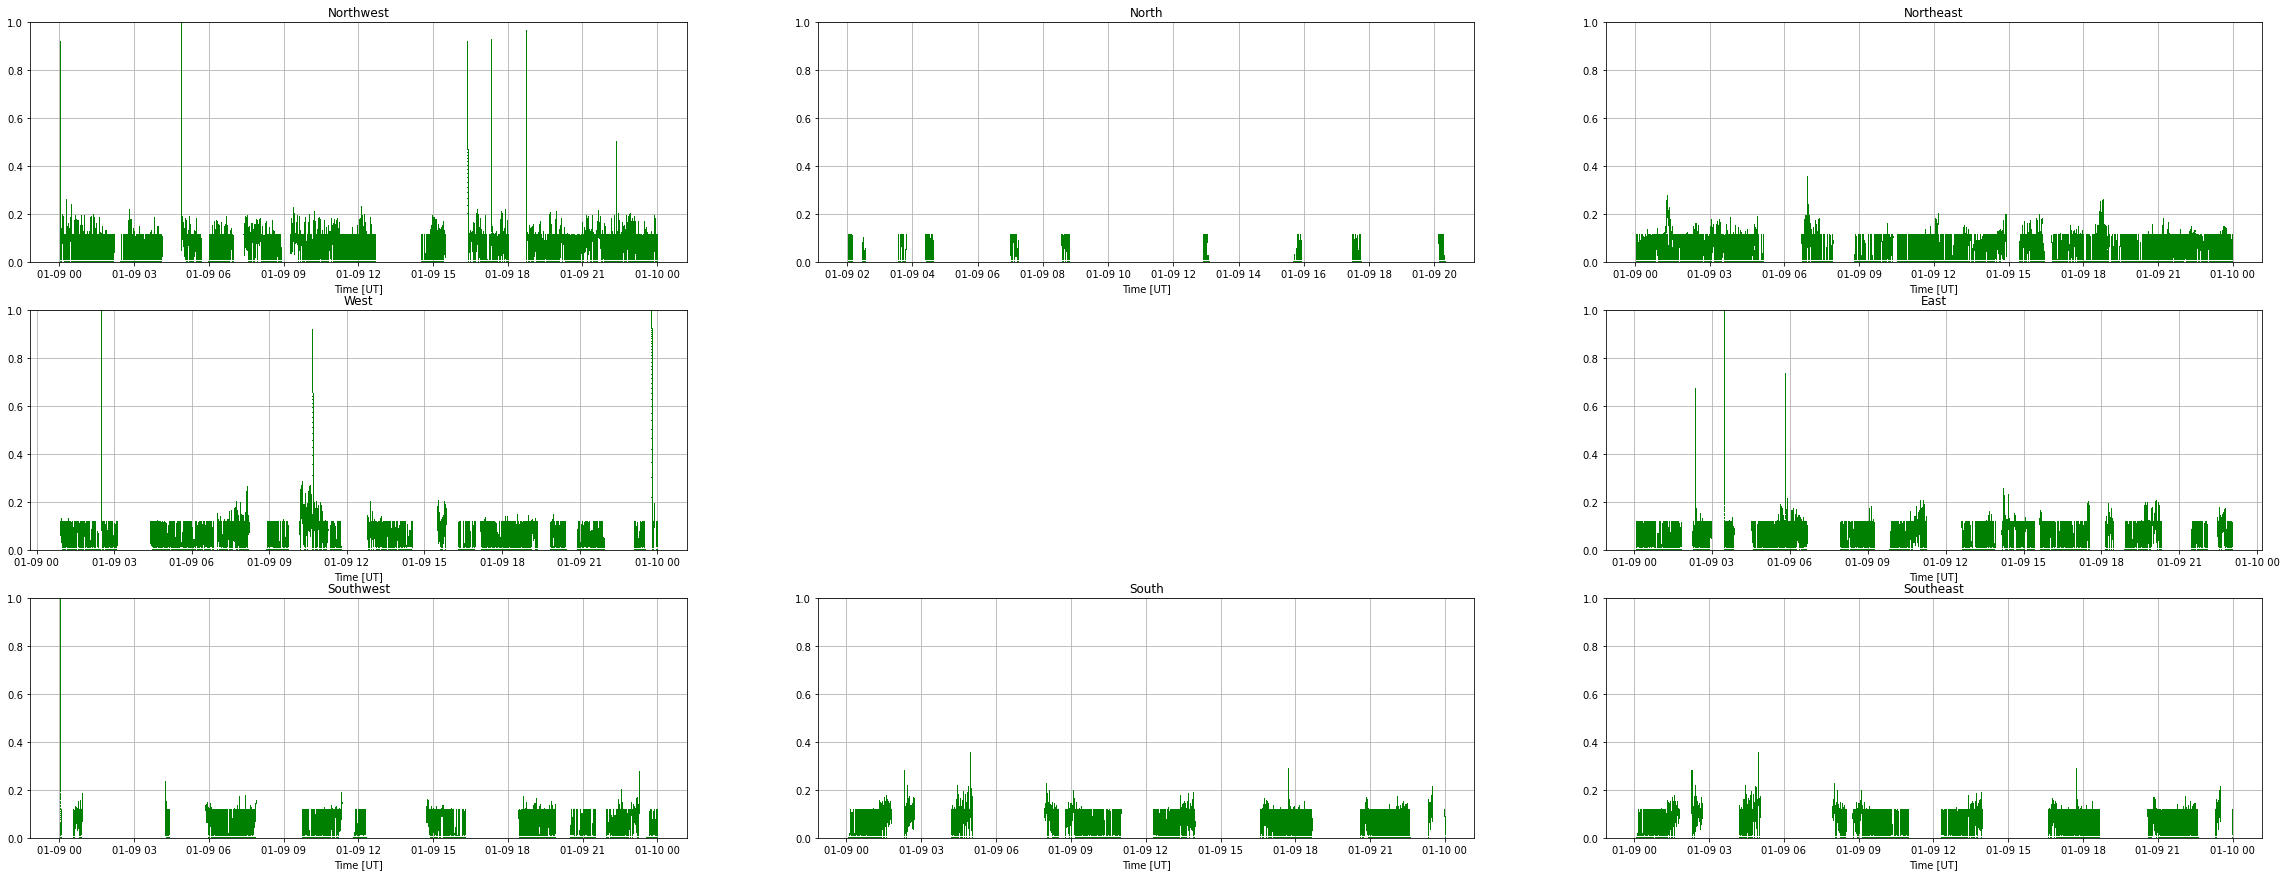

In [208]:
fig1, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3)
fig1.set_figheight(15)
fig1.set_figwidth(40)
ax5.set_visible(False)

xx = df_NW['Time']
yy = df_NW['S4']
ax1.set_title('Northwest')
ax1.set_ylim([0, 1])
ax1.set_xlabel('Time [UT]')
ax1.plot(xx,yy,',', color='g')
ax1.grid(True)

xx = df_N['Time']
yy = df_N['S4']
ax2.set_title('North')
ax2.set_ylim([0, 1])
ax2.set_xlabel('Time [UT]')
ax2.plot(xx,yy,',', color='g')
ax2.grid(True)

xx = df_NE['Time']
yy = df_NE['S4']
ax3.set_title('Northeast')
ax3.set_ylim([0, 1])
ax3.set_xlabel('Time [UT]')
ax3.plot(xx,yy,',', color='g')
ax3.grid(True)

xx = df_E['Time']
yy = df_E['S4']
ax6.set_title('East')
ax6.set_ylim([0, 1])
ax6.set_xlabel('Time [UT]')
ax6.plot(xx,yy,',', color='g')
ax6.grid(True)

xx = df_SE['Time']
yy = df_SE['S4']
ax9.set_title('Southeast')
ax9.set_ylim([0, 1])
ax9.set_xlabel('Time [UT]')
ax9.plot(xx,yy,',', color='g')
ax9.grid(True)

xx = df_S['Time']
yy = df_S['S4']
ax8.set_title('South')
ax8.set_ylim([0, 1])
ax8.set_xlabel('Time [UT]')
ax8.plot(xx,yy,',', color='g')
ax8.grid(True)

xx = df_SW['Time']
yy = df_SW['S4']
ax7.set_title('Southwest')
ax7.set_ylim([0, 1])
ax7.set_xlabel('Time [UT]')
ax7.plot(xx,yy,',', color='g')
ax7.grid(True)

xx = df_W['Time']
yy = df_W['S4']
ax4.set_title('West')
ax4.set_ylim([0, 1])
ax4.set_xlabel('Time [UT]')
ax4.plot(xx,yy,',', color='g')
ax4.grid(True)



plt.show()
#fig.tight_layout()